# Linear Discriminant Functions

Linear model은 다음과 같은 식으로 나타낼 수 있다.

- $g(x) = Wx + w_0$

D-dimensional feature vector가 있을 때, D+1개의 파라미터를 갖는 간단한 모델이다.


## [Exercise 1] Linear Classifier with Widrow-Hoff Algorithm

- Objective function : $J(a) = \frac{1}{2}\sum_i^n(L_i-L'_i)^2$ where, $L'_i  = a^T y$ and $L_i \in{ \{-1, 1 \}}$
- Optimization method : Gradient Descent Algorithm
- Data set : Iris Data set


In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#### pandas : Data manipulation을 도와주는 라이브러리

http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width','petal_length','petal_width','class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### numpy.where(condition[, x, y])
condition을 만족하는 인덱스를 찾아주거나,
인자에 x,y가 있을 때 condition이 True이면 x 반환, False이면 y반환
https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

##### pandas.DataFrame.iloc
인덱스로 DataFrame의 일부분 접근
http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html

In [72]:
df.iloc[[1,50,100]]

,sepal_length,sepal_width,petal_length,petal_width,class
1,4.9,3.0,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [8]:
df.iloc[1:2, [1,4]]

,sepal_width,class
1,3,Iris-setosa


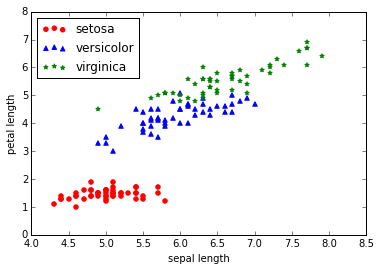

In [83]:
# y
L=df.iloc[0:150, 4].values
L1=np.where(L == 'Iris-setosa', 1, -1)
L2=np.where(L == 'Iris-versicolor', 1, -1)
L3=np.where(L == 'Iris-virginica', 1, -1)
X=df.iloc[:,[0,2]].values

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='^', label='versicolor')
plt.scatter(X[100:150,0], X[100:150,1], color='green', marker='*', label='virginica')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

#### Adaptive linear machine with Widrow-Hoff rule

In [108]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, L):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (L-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return self.activation(X)

#### Test the classifier and plot data with two different learning rates: And draw figures

In [109]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada1 = AdalineGD(n_iter=60, eta=0.001).fit(X_std,L1)
ada2 = AdalineGD(n_iter=60, eta=0.001).fit(X_std,L2)
ada3 = AdalineGD(n_iter=60, eta=0.001).fit(X_std,L3)

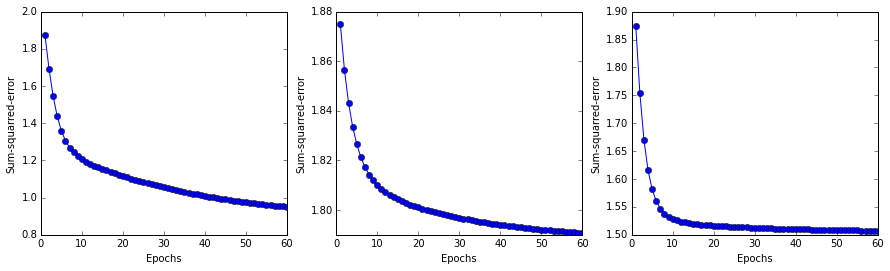

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15,4))
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squarred-error')

ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squarred-error')

ax[2].plot(range(1, len(ada3.cost_)+1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squarred-error')

plt.show()

#### Feature scaling by standardization

Standardize by feature value by subtrating means, and dividing by standard deviation, such that the feature values have the property of standard normal distribution.

$x'_j = \frac{x_j - \mu_j}{\sigma_j}$

In [13]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

Standardized Dataset에서 데이터 분포가 어떻게 변하는지 살펴봅시다

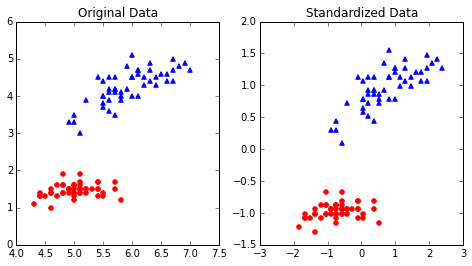

In [14]:
# draw two column plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
ax[0].scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
ax[0].scatter(X[50:100,0], X[50:100,1], color='blue', marker='^', label='versicolor')
ax[0].set_title('Original Data')

ax[1].scatter(X_std[:50,0], X_std[:50,1], color='red', marker='o', label='setosa')
ax[1].scatter(X_std[50:100,0], X_std[50:100,1], color='blue', marker='^', label='versicolor')
ax[1].set_title('Standardized Data')

standardized data를 이용해 $\eta=0.01$로 Adaline을 train 해봅시다.

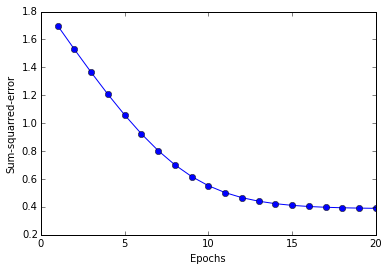

In [16]:
# 위를 참고하여 구현해보세요.
ada = AdalineGD(n_iter=20, eta=0.01).fit(X_std,L)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squarred-error')

훈련된 AdalineGD에서 predict 하는 방법은 다음과 같습니다.

In [76]:
ada.predict([[0,0],[-2,-1]])

array([ -3.47684828e+03,  -4.48618831e+18])

### Standardized data 시각화

지난 시간과 같은 방법으로 decision boundary 그리기

$ \mathbf{w}^T\mathbf{x}=0 \rightarrow y=a*x+b$ 이 형태로 바꾸어서 plot

$ \begin{bmatrix} w_0 \\ w_1\\w_2 \end{bmatrix}^T \begin{bmatrix}1\\x\\ y \end{bmatrix}= w_0 + w_1 x + w_2 y=0$

In [94]:
# weights와 x를 이용해 y를 반환
def g(w, x):
#    return np.zeros(len(x))
    return -(w[0]+x*w[1])/w[2]

In [95]:
import matplotlib.cm as cm

In [96]:
# draw a plot
def draw_plot(X,ada):
    plt.scatter(X[:,0],X[:,1],c=ada.predict(X),cmap=plt.cm.autumn)
    plt.plot(np.arange(-3,3), g(ada.w_, np.arange(-3,3)))
    plt.title('Adaline -Gradient Descent')
    plt.xlabel('sepal length [standardized]')
    plt.ylabel('petal length [standardized]')
    plt.legend(loc='upper left')
    plt.show()

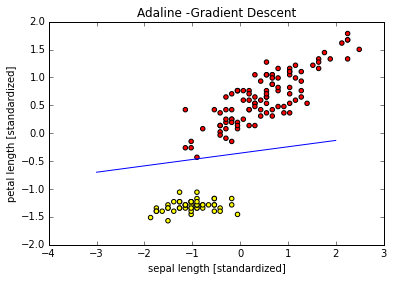

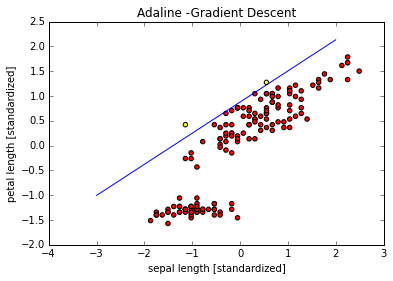

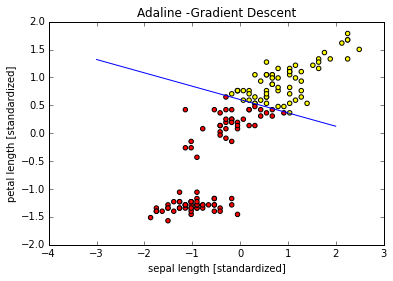

In [105]:
draw_plot(X_std, ada1)
draw_plot(X_std, ada2)
draw_plot(X_std, ada3)



In [112]:
ex=[0,1]
print ada1.predict(ex)
print ada2.predict(ex)
print ada3.predict(ex)

-1.26566593739
0.0465655044668
0.219158661418


### Optimization 과정 시각화

In [73]:
# draw _plot 함수를 이용해 시각화 과정을 나타내시오.
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, L):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (L-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            draw_plot(X,self)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return self.activation(X)

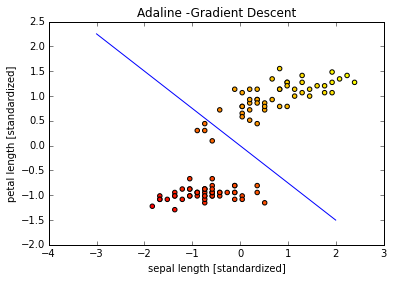

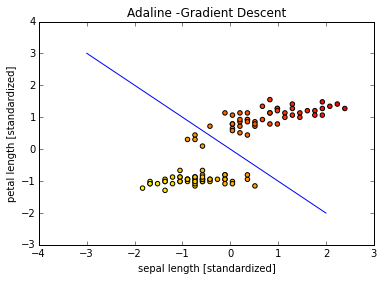

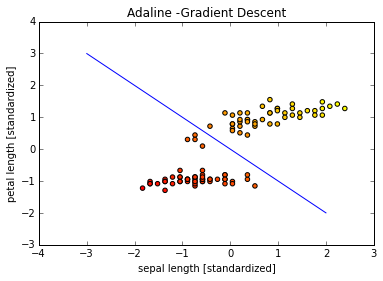

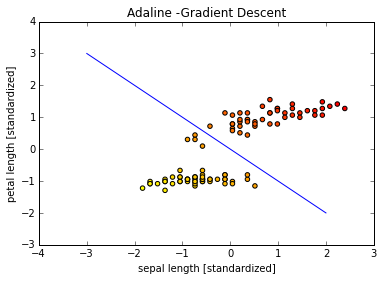

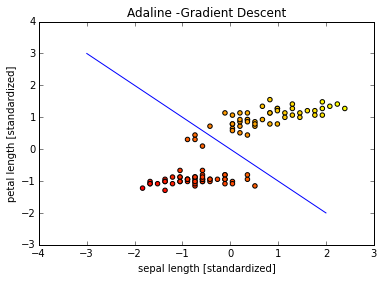

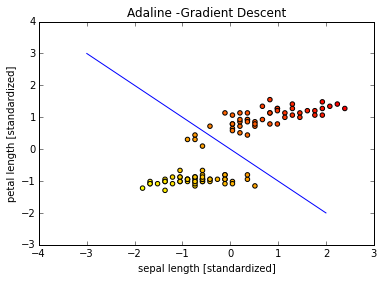

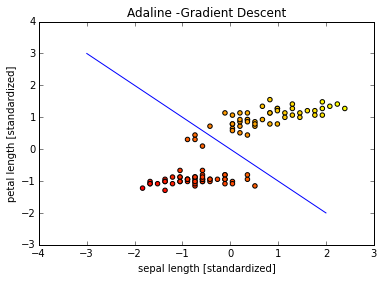

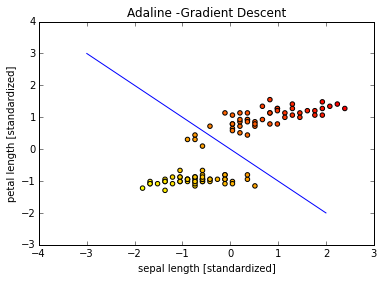

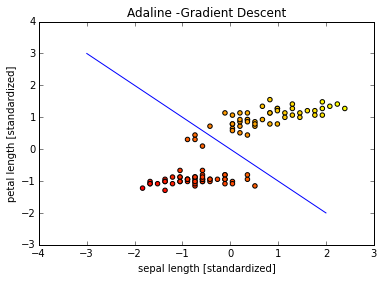

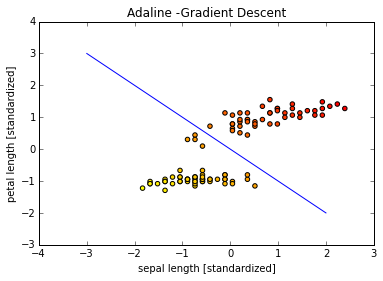

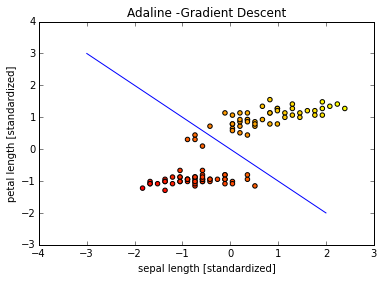

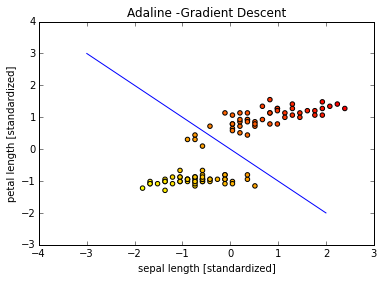

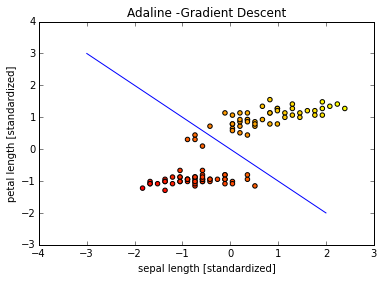

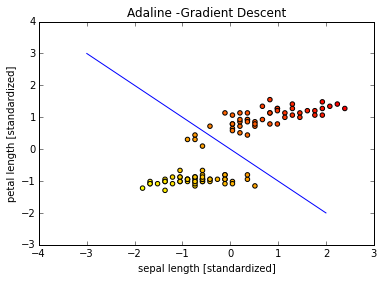

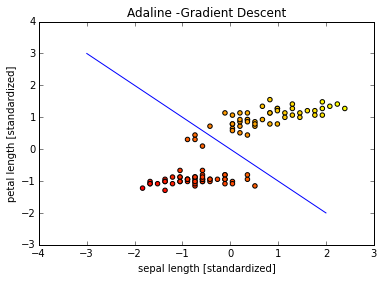

In [75]:
ada = AdalineGD(n_iter=15, eta=0.1).fit(X_std,L)